✅ Sample data inserted successfully!

📊 Sales Summary:
      product  total_qty   revenue
0  Headphones         30   60000.0
1    Keyboard         20   30000.0
2      Laptop         10  600000.0
3     Monitor         14  168000.0
4       Mouse         40   20000.0


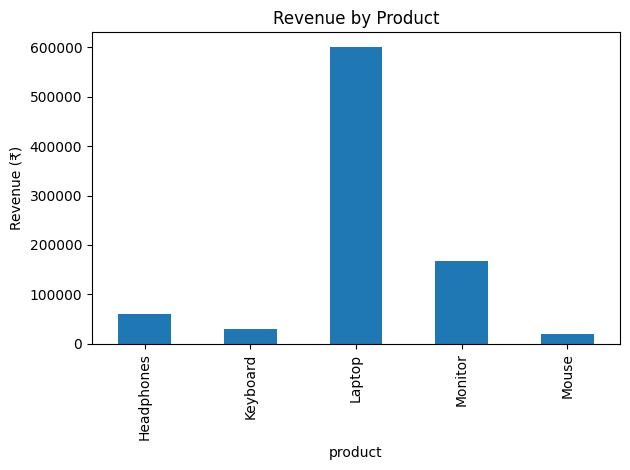

🔒 Database connection closed.


<Figure size 640x480 with 0 Axes>

In [2]:

# Basic Sales Summary using Python + SQLite
# Step 1: Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Connect to SQLite database (file auto create hogi)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 3: Create 'sales' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 4: Insert sample data
data = [
    ("Laptop", 5, 60000),
    ("Mouse", 20, 500),
    ("Keyboard", 10, 1500),
    ("Monitor", 7, 12000),
    ("Headphones", 15, 2000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()

print("✅ Sample data inserted successfully!")

# Step 5: Run SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print("\n📊 Sales Summary:")
print(df)

# Step 6: Plot simple bar chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

# Step 7: Save chart (optional)
plt.savefig("sales_chart.png")

# Step 8: Close connection
conn.close()
print("🔒 Database connection closed.")